<a href="https://colab.research.google.com/github/rohini-rs1/TSF1/blob/master/Task%201%20linear%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 2 :-To Explore Supervised Machine Learning**


**In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied.** 

**Import libraries**

In [21]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

**Import dataset**

In [19]:
url = 'http://bit.ly/w-data'
data = pd.read_csv(url)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving student_scores.csv to student_scores.csv


In [3]:
import io
data = pd.read_csv(io.BytesIO(uploaded['student_scores.csv']))

In [20]:
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


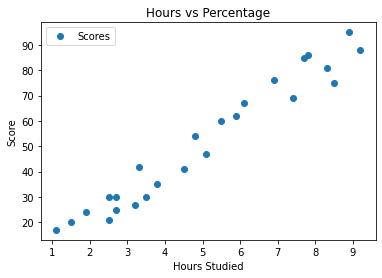

In [6]:
#plotting the distribution scores
data.plot(x='Hours', y='Scores', style='o') 
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score')  
plt.show()

**Preparing the data**

In [7]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

**Splitting data into train and test**

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

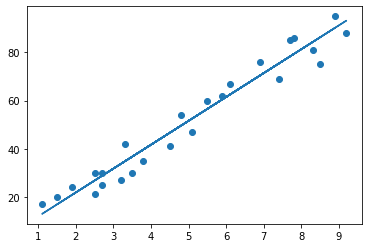

In [10]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [11]:
#To retrieve the intercept:
print(regressor.intercept_)


2.018160041434662


In [12]:
#For retrieving the slope:
print(regressor.coef_)

[9.91065648]


This means that for every one unit of change in hours in studied, the change in the score is about 9.91%. 

In [ ]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


**Making the prediction score**

In [13]:
# Predicting the scores
y_pred = regressor.predict(X_test)

In [14]:
# Comparing Actual vs Predicted Score
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [15]:
n = float(input())
hours = np.array([n])
hours = hours.reshape(-1,1)
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

9.25
No of Hours = [[9.25]]
Predicted Score = 93.69173248737539


**Evaluating the model**

In [16]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
